## Analysis: 2015 Flight Delays and Cancellations in US


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

### Loadind Data

In [2]:
df = pd.read_csv(r"C:\Users\nhnah\OneDrive\Desktop\flights.csv")
df.head(3).append(df.tail(3))

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,11,28,6,DL,1590,N971AT,CAE,ATL,700,...,756.0,-12,0,0,Not Cancelled,0,0,0,0,0
1,2015,11,2,1,AA,2516,N3CVAA,ORD,DEN,1715,...,1940.0,41,0,0,Not Cancelled,13,0,28,0,0
2,2015,8,22,6,AS,93,N317AS,SEA,ANC,1355,...,1619.0,-16,0,0,Not Cancelled,0,0,0,0,0
274961,2015,7,12,7,DL,2794,N662DN,DTW,ATL,725,...,931.0,11,0,0,Not Cancelled,0,0,0,0,0
274962,2015,11,16,1,AS,182,N767AS,ANC,SEA,1100,...,1505.0,-19,0,0,Not Cancelled,0,0,0,0,0
274963,2015,1,29,4,B6,761,N746JB,LGA,PBI,1945,...,2241.0,-4,0,0,Not Cancelled,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274964 entries, 0 to 274963
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 274964 non-null  int64  
 1   MONTH                274964 non-null  int64  
 2   DAY                  274964 non-null  int64  
 3   DAY_OF_WEEK          274964 non-null  int64  
 4   AIRLINE              274964 non-null  object 
 5   FLIGHT_NUMBER        274964 non-null  int64  
 6   TAIL_NUMBER          274225 non-null  object 
 7   ORIGIN_AIRPORT       274964 non-null  object 
 8   DESTINATION_AIRPORT  274964 non-null  object 
 9   SCHEDULED_DEPARTURE  274964 non-null  int64  
 10  DEPARTURE_TIME       270719 non-null  float64
 11  DEPARTURE_DELAY      274964 non-null  int64  
 12  TAXI_OUT             270571 non-null  float64
 13  WHEELS_OFF           270571 non-null  float64
 14  SCHEDULED_TIME       274964 non-null  int64  
 15  ELAPSED_TIME     

In [4]:
df.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER             739
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME         4245
DEPARTURE_DELAY           0
TAXI_OUT               4393
WHEELS_OFF             4393
SCHEDULED_TIME            0
ELAPSED_TIME           5191
AIR_TIME               5191
DISTANCE                  0
WHEELS_ON              4587
TAXI_IN                4587
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME           4587
ARRIVAL_DELAY             0
DIVERTED                  0
CANCELLED                 0
CANCELLATION_REASON       0
AIR_SYSTEM_DELAY          0
SECURITY_DELAY            0
AIRLINE_DELAY             0
LATE_AIRCRAFT_DELAY       0
WEATHER_DELAY             0
dtype: int64

In [5]:
df1 = pd.read_csv(r"C:\Users\nhnah\OneDrive\Desktop\airlines.csv")
df1

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [7]:
df1.isnull().sum()

IATA_CODE    0
AIRLINE      0
dtype: int64

In [8]:
df2 = pd.read_csv(r"C:\Users\nhnah\OneDrive\Desktop\airports.csv")
df2

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   322 non-null    float64
 6   LONGITUDE  322 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [10]:
df2.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [11]:
#Get the shape of each df to get an idea about the number of instances
print('Airlines shape: {}'.format(df1.shape),
       'Flights shape: {}'.format(df.shape),
       'Airports shape: {}'.format(df2.shape),
       sep='\n')

Airlines shape: (14, 2)
Flights shape: (274964, 31)
Airports shape: (322, 7)


### Data Cleaning/Pre-processing

In [12]:
# Check unique values in Airline column from flights.csv file
df.AIRLINE.unique()

array(['DL', 'AA', 'AS', 'US', 'OO', 'WN', 'UA', 'EV', 'B6', 'HA', 'F9',
       'MQ', 'VX', 'NK'], dtype=object)

In [13]:
# Renaming airline codes to company names

df['AIRLINE'].replace({
   'UA':'United Air Lines Inc.',
   'AA':'American Airlines Inc.',
   'US':'Airways Inc.',
   'F9':'Frontier Airlines Inc.',
   'B6':'JetBlue Airways',
   'OO':'Skywest Airlines Inc.',
   'AS':'Alaska Airlines Inc.',
   'NK':'Spirit Air Lines',
   'WN':'Southwest Airlines Co.',
   'DL':'Delta Air Lines Inc.',
   'EV':'Atlantic Southeast Airlines',
   'HA':'Hawaiian Airlines Inc.',
   'MQ':'American Eagle Airlines Inc.',
   'VX':'Virgin America'

},inplace=True)

In [14]:
df.AIRLINE.unique()

array(['Delta Air Lines Inc.', 'American Airlines Inc.',
       'Alaska Airlines Inc.', 'Airways Inc.', 'Skywest Airlines Inc.',
       'Southwest Airlines Co.', 'United Air Lines Inc.',
       'Atlantic Southeast Airlines', 'JetBlue Airways',
       'Hawaiian Airlines Inc.', 'Frontier Airlines Inc.',
       'American Eagle Airlines Inc.', 'Virgin America',
       'Spirit Air Lines'], dtype=object)

In [15]:
#Check unique values of MONTH Column from flights.csv file 
df.MONTH.unique()

array([11,  8,  6,  3,  9,  7,  5,  1,  2, 12,  4], dtype=int64)

In [16]:
#Replacing Month values with Month Name
df['MONTH'].replace({
   1:'January',
   2:'February',
   3:'March',
   4:'April',
   5:'May',
   6:'June',
   7:'July',
   8:'August',
   9:'September',
   10:'October',
   11:'November',
   12:'December'
},inplace=True)


In [17]:
#Check unique values of DAY_OF_WEEK Column from flights.csv file
df.DAY_OF_WEEK.unique()

array([6, 1, 5, 7, 2, 3, 4], dtype=int64)

In [18]:
#Replacing Day of Week values with Day Name
df['DAY_OF_WEEK'].replace({
   1:'Monday',
   2:'Tuesday',
   3:'Wednesday',
   4:'Thursday',
   5:'Friday',
   6:'Saturday',
   7:'Sunday'
},inplace=True)

In [19]:
df.DAY_OF_WEEK.unique()

array(['Saturday', 'Monday', 'Friday', 'Sunday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

### Cancelled Flights Exploration

In [20]:
# Total number of canceled flights
df.CANCELLED.sum()

4433

In [21]:
# Let's explore column CANCELLED
df.CANCELLED.unique()

array([0, 1], dtype=int64)

In [22]:
# From above we see it's binary: 0 or 1, let's see how it looks like
cancelled = df[(df['CANCELLED'] > 0)]
cancelled.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
125,2015,January,23,Friday,Atlantic Southeast Airlines,4091,N12540,IND,EWR,1922,...,NaN,0,0,1,Weather,0,0,0,0,0
247,2015,March,2,Monday,Atlantic Southeast Airlines,4926,N849AS,GSO,DTW,720,...,NaN,0,0,1,Weather,0,0,0,0,0
259,2015,March,1,Sunday,Atlantic Southeast Airlines,4345,N11199,IAH,CRP,914,...,NaN,0,0,1,Weather,0,0,0,0,0


###### Canceled flights are not delayed flights.If canceled, the flight didn’t happen, and values are NaN. We can filter out Canceled Flights for our analysis. Departure Delay is actual Departure Time. Arrival Delay is total delay on Arrival in minutes. If both of these numbers are negative then there was no delay.

### Departure Delay and Arrival Delay Exploration

In [23]:
# Departure delay data (in minutes)
df.DEPARTURE_DELAY.head()

0    -5
1    28
2    -2
3     2
4    -5
Name: DEPARTURE_DELAY, dtype: int64

In [24]:
df.DEPARTURE_DELAY.isnull().sum()

0

In [25]:
# Arrival delay data (in minutes)
df.ARRIVAL_DELAY.head()

0   -12
1    41
2   -16
3    -7
4    -6
Name: ARRIVAL_DELAY, dtype: int64

###### If a number is positive then the flight delayed since that we’re exploring only delayed flights, non-delayed should be disregarded.The problem of keeping those is, if we summarise for plotting for example, we’ll get false data because sum of delayed minutes will be less and the negative numbers that will subtract the real delays. Let’s define what a delayed flight is: A Delayed flight is a flight that arrives late at its destination.Flight can be delayed on departure but still, arrive on time is not a delayed flight.

In [26]:
# To do this analysis right, let's filter all negative numbers in ARRIVAL_DELAY column
# Number of delayed flights 
df[df.ARRIVAL_DELAY > 0 ].count()

YEAR                   100463
MONTH                  100463
DAY                    100463
DAY_OF_WEEK            100463
AIRLINE                100463
FLIGHT_NUMBER          100463
TAIL_NUMBER            100463
ORIGIN_AIRPORT         100463
DESTINATION_AIRPORT    100463
SCHEDULED_DEPARTURE    100463
DEPARTURE_TIME         100463
DEPARTURE_DELAY        100463
TAXI_OUT               100463
WHEELS_OFF             100463
SCHEDULED_TIME         100463
ELAPSED_TIME           100463
AIR_TIME               100463
DISTANCE               100463
WHEELS_ON              100463
TAXI_IN                100463
SCHEDULED_ARRIVAL      100463
ARRIVAL_TIME           100463
ARRIVAL_DELAY          100463
DIVERTED               100463
CANCELLED              100463
CANCELLATION_REASON    100463
AIR_SYSTEM_DELAY       100463
SECURITY_DELAY         100463
AIRLINE_DELAY          100463
LATE_AIRCRAFT_DELAY    100463
WEATHER_DELAY          100463
dtype: int64

In [27]:
# Filter out non-delayed flights < 0 DEP_DELAY
df = df[(df['ARRIVAL_DELAY'] > 0)]

In [28]:
df.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

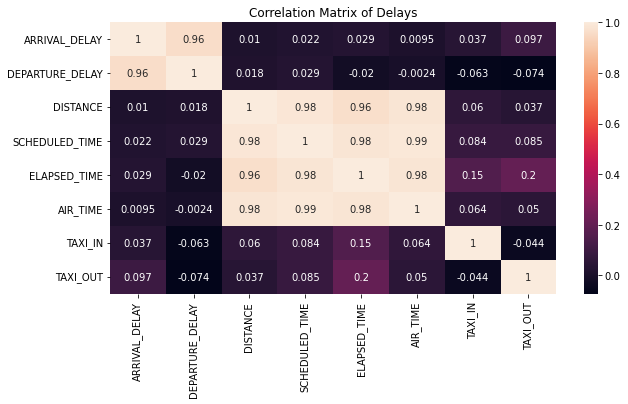

In [29]:
# Checking Correlation 
import seaborn as sns
import matplotlib.pyplot as plt
corr_mat=df[['ARRIVAL_DELAY','DEPARTURE_DELAY','DISTANCE','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT']].corr()
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(corr_mat,annot=True,ax=ax)
ax.set_title('Correlation Matrix of Delays')
plt.show()

 ##### From above, we can see that Arrival Delay and Departure Delay have more strong relationship compared to others and maximum of the Arrival delays happened due to Departure delays but some flights still arrived on time even after departed late from the airport.

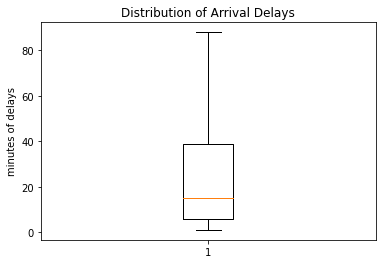

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(df.loc[:, ['ARRIVAL_DELAY']],showfliers=False)
plt.ylabel('minutes of delays')
plt.title('Distribution of Arrival Delays')
plt.show()

######  Data Visualization

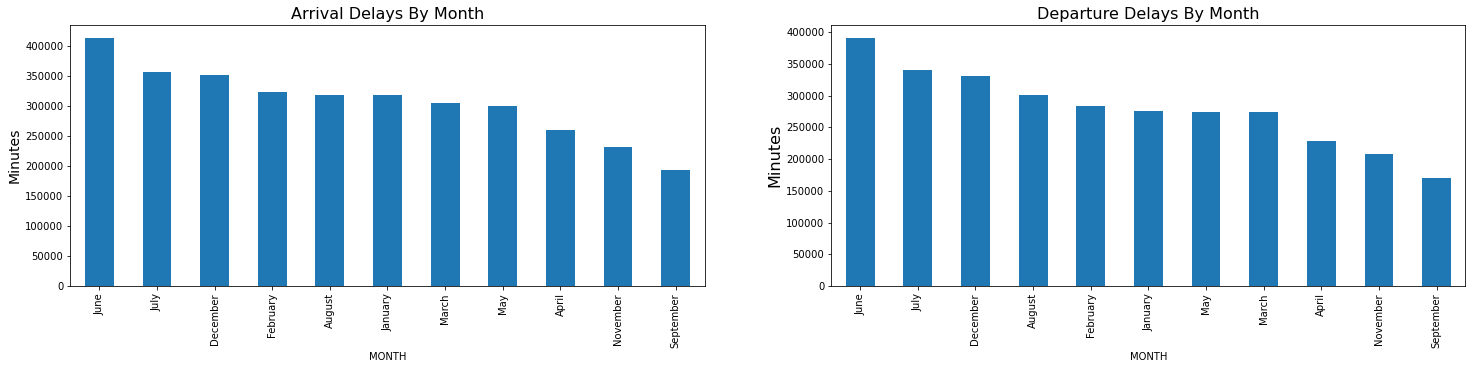

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
# Arrival and departure delays by month of the year
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

plt.subplot(2, 2 ,1)
df.groupby('MONTH').ARRIVAL_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('Arrival Delays By Month', fontsize=16)
plt.ylabel('Minutes', fontsize=14)
#plt.xlabel('Month of the year', fontsize=14)

plt.subplot(2, 2 ,2)
df.groupby('MONTH').DEPARTURE_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('Departure Delays By Month', fontsize=16)
plt.ylabel('Minutes', fontsize=16)
#plt.xlabel('Month of the year', fontsize=16)

plt.show()

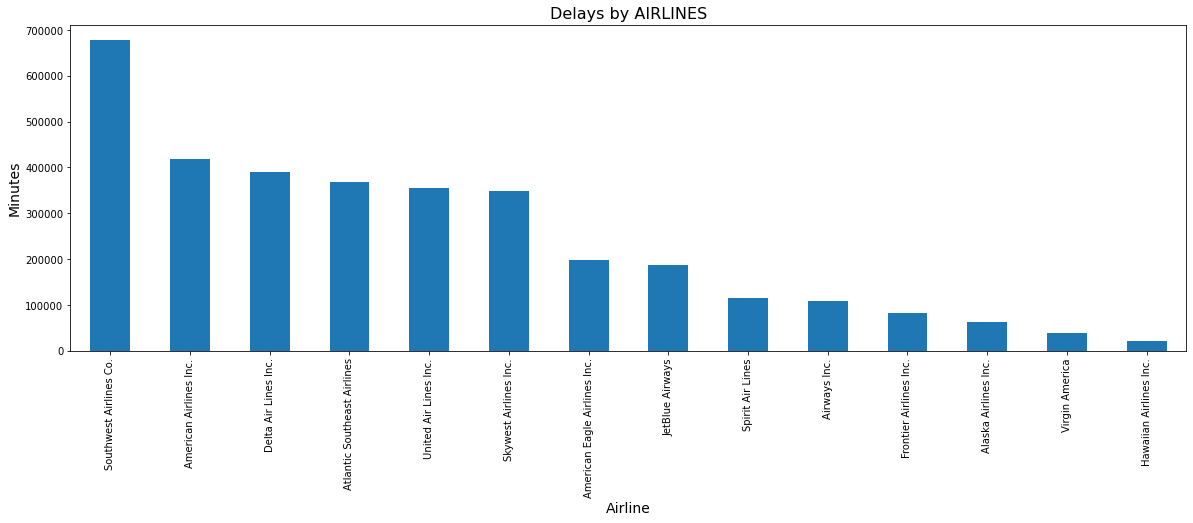

In [32]:
# Delays by airlines
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
df.groupby('AIRLINE').ARRIVAL_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('Delays by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Minutes', fontsize=14)
plt.show()